# import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
from scipy import sparse



# load the data

In [2]:
df = pd.read_csv('u.data' , sep = '\t' , header=None)
df

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


# columns renaming

In [3]:
df = df.rename(columns={0:'user' , 1:'movie' , 2:'rating' , 3:'time'})
df

,user,movie,rating,time
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


# data visualization

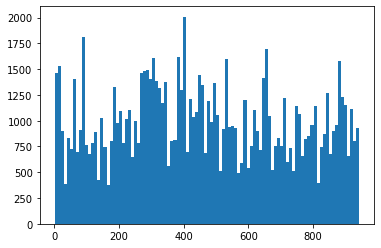

In [12]:
plt.hist(df['user'] , bins = 100)
plt.show()

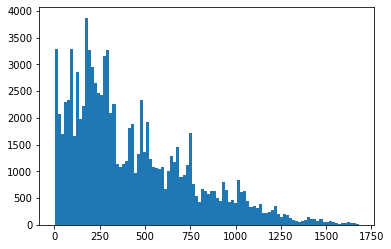

In [13]:
plt.hist(df['movie'] , bins = 100)
plt.show()

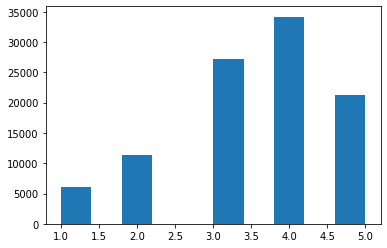

In [29]:
plt.hist(df['rating'] , bins = 10)
plt.show()

In [30]:
df['rating'].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: rating, dtype: int64

**print out the total number of unique users and movies (print the total number of movies and the total number of users – not users and movies themselves)**

In [4]:
print('Total number of users is: {}'.format(df['user'].nunique()))
print('Total number of movies is: {}'.format(df['movie'].nunique()))

Total number of users is: 943
Total number of movies is: 1682


In [5]:
num_users = df['user'].nunique()
num_movies = df['movie'].nunique()


In [6]:
users = df["user"].unique()
movies = df["movie"].unique()
shape = (len(users), len(movies))
shape

(943, 1682)

**create our utility matrix (user-item matrix) and print out some of its entries. The matrix will be used to compute similarity between users and items.**

In [7]:
mat = np.zeros((num_users , num_movies))

for line in df.itertuples():
    mat[line[1]-1 , line[2]-1 ] = line[3]
    
mat

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

**we need to save the memory. Accordingly, we have been asked to convert this giant rating matrix into a dense matrix in the form provided below**

In [8]:
csr_2 = sparse.csr_matrix(mat)

print(csr_2)

  (0, 0)	5.0
  (0, 1)	3.0
  (0, 2)	4.0
  (0, 3)	3.0
  (0, 4)	3.0
  (0, 5)	5.0
  (0, 6)	4.0
  (0, 7)	1.0
  (0, 8)	5.0
  (0, 9)	3.0
  (0, 10)	2.0
  (0, 11)	5.0
  (0, 12)	5.0
  (0, 13)	5.0
  (0, 14)	5.0
  (0, 15)	5.0
  (0, 16)	3.0
  (0, 17)	4.0
  (0, 18)	5.0
  (0, 19)	4.0
  (0, 20)	1.0
  (0, 21)	4.0
  (0, 22)	4.0
  (0, 23)	3.0
  (0, 24)	4.0
  :	:
  (942, 738)	4.0
  (942, 755)	2.0
  (942, 762)	4.0
  (942, 764)	3.0
  (942, 784)	2.0
  (942, 793)	3.0
  (942, 795)	3.0
  (942, 807)	4.0
  (942, 815)	4.0
  (942, 823)	4.0
  (942, 824)	3.0
  (942, 830)	2.0
  (942, 839)	4.0
  (942, 927)	5.0
  (942, 940)	1.0
  (942, 942)	5.0
  (942, 1010)	2.0
  (942, 1027)	2.0
  (942, 1043)	3.0
  (942, 1046)	2.0
  (942, 1066)	2.0
  (942, 1073)	4.0
  (942, 1187)	3.0
  (942, 1227)	3.0
  (942, 1329)	3.0


In [9]:
# Create indices for users and movies
user_cat = CategoricalDtype(categories=sorted(users), ordered=True)
movie_cat = CategoricalDtype(categories=sorted(movies), ordered=True)
user_index = df["user"].astype(user_cat).cat.codes
movie_index = df["movie"].astype(movie_cat).cat.codes
coo = sparse.coo_matrix((df["rating"], (user_index, movie_index)), shape=shape)


In [10]:
csr = coo.todense()
csr

matrix([[5, 3, 4, ..., 0, 0, 0],
        [4, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [5, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 5, 0, ..., 0, 0, 0]])

In [11]:
# Conversion via COO matrix
csr_dense = sparse.csr_matrix(csr)
print(csr_dense)

  (0, 0)	5
  (0, 1)	3
  (0, 2)	4
  (0, 3)	3
  (0, 4)	3
  (0, 5)	5
  (0, 6)	4
  (0, 7)	1
  (0, 8)	5
  (0, 9)	3
  (0, 10)	2
  (0, 11)	5
  (0, 12)	5
  (0, 13)	5
  (0, 14)	5
  (0, 15)	5
  (0, 16)	3
  (0, 17)	4
  (0, 18)	5
  (0, 19)	4
  (0, 20)	1
  (0, 21)	4
  (0, 22)	4
  (0, 23)	3
  (0, 24)	4
  :	:
  (942, 738)	4
  (942, 755)	2
  (942, 762)	4
  (942, 764)	3
  (942, 784)	2
  (942, 793)	3
  (942, 795)	3
  (942, 807)	4
  (942, 815)	4
  (942, 823)	4
  (942, 824)	3
  (942, 830)	2
  (942, 839)	4
  (942, 927)	5
  (942, 940)	1
  (942, 942)	5
  (942, 1010)	2
  (942, 1027)	2
  (942, 1043)	3
  (942, 1046)	2
  (942, 1066)	2
  (942, 1073)	4
  (942, 1187)	3
  (942, 1227)	3
  (942, 1329)	3


In [12]:
# def load_data_ml100k(data, num_users, num_items, feedback='explicit'):
#     users, items, scores = [], [], []
#     inter = np.zeros((num_items, num_users)) if feedback == 'explicit' else {}
#     for line in data.itertuples():
#         user_index, item_index = int(line[1] - 1), int(line[2] - 1)
#         score = int(line[3]) if feedback == 'explicit' else 1
#         users.append(user_index)
#         items.append(item_index)
#         scores.append(score)
#         if feedback == 'implicit':
#             inter.setdefault(user_index, []).append(item_index)
#         else:
#             inter[item_index, user_index] = score
#     return users, items, scores, inter

In [13]:
# users, items, scores, inter = load_data_ml100k(df , num_users , num_movies )

In [14]:
# inter

**compute similarity between movies using cosine similarity**

In [15]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute' , n_neighbors=3, n_jobs=-1)
knn.fit(csr_dense)
# distances, indices = knn.kneighbors(csr_2.T, n_neighbors=3)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=3)

**print out the 20 movies being liked by the specified user**

In [16]:
user_1_data = df.loc[df['user'] == 1]

user_1_sorted = user_1_data.sort_values(['rating' , 'time'] ,  ascending=False)

user_1_sorted_movies = user_1_sorted['movie'].tolist()

filtered = user_1_sorted_movies[0:20]

print('The 20 movies that are liked by user 1 are: {}'.format(filtered))

The 20 movies that are liked by user 1 are: [171, 111, 242, 32, 270, 6, 221, 129, 258, 228, 44, 86, 100, 154, 9, 169, 178, 87, 16, 12]


In [17]:
user_1_sorted

,user,movie,rating,time
687,1,171,5,889751711
88259,1,111,5,889751711
10922,1,242,5,889751633
25255,1,32,5,888732909
27216,1,270,5,888732827
...,...,...,...,...
23095,1,247,1,875241619
17988,1,243,1,875241390
7101,1,143,1,875072631
31650,1,8,1,875072484


In [18]:
len(filtered)

20

In [19]:
# extracted = df.sort_values(['user' , 'time'] ,  ascending=False)

# filtered = extracted[extracted['user'] == 1]['movie']

# filtered = filtered.tolist()

# filtered = filtered[0:20]
# print(filtered)

**for each movie being liked by user1 (user_id = 1), recommend 2 similar movies**

In [20]:
movies = [] 

for i in filtered:
    
    distances , indices =  knn.kneighbors(csr_dense[i] , n_neighbors=4)
    indices = np.reshape(indices , -1)
    indices = indices[1:3]
    movies.extend(indices)
    
    
    

In [21]:
type(indices)

numpy.ndarray

In [22]:
print('Recommended movies are: {}'.format(movies))

Recommended movies are: [436, 311, 615, 855, 105, 614, 501, 510, 473, 536, 649, 312, 681, 108, 275, 681, 116, 424, 239, 712, 702, 100, 647, 932, 402, 937, 172, 528, 473, 5, 509, 852, 205, 919, 146, 110, 656, 539, 233, 449]


In [23]:
len(movies)

40